In [2]:
#Lab Report 6: Options & Volatility
%matplotlib inline

import math as mt
import numpy as np
import sympy as sym
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
#Question 1
c = 5 #coupon
ymin = 0.0 
ymax = 0.1
ystep = .01
y = np.arange(ymin,ymax+ystep,ystep)
fx = c/(1+y)+c/(1+y)**2+c/(1+y)**3+c/(1+y)**4+(c+100)/(1+y)**5;

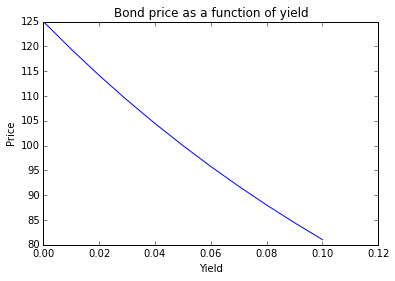

In [4]:
plt.plot(y,fx)
plt.title('Bond price as a function of yield')
plt.ylabel('Price')
plt.xlabel('Yield')
plt.show()

In [5]:
#Bisection
tol = 1.e-8
itr = 100 #number of iterations

x_lo = 0
x_hi = 0.1
f_lo = c/(1+x_lo)+c/(1+x_lo)**2+c/(1+x_lo)**3+c/(1+x_lo)**4+(c+100)/(1+x_lo)**5
f_hi = c/(1+x_hi)+c/(1+x_hi)**2+c/(1+x_hi)**3+c/(1+x_hi)**4+(c+100)/(1+x_hi)**5
price = 102

#if mt.copysign(1,f_lo) == mt.copysign(1,f_hi):
#    print "*** Error: solution is not bracketed" 

for x in np.arange(1,itr):
    x_new = (x_lo+x_hi)/2
    f_new = c/(1+x_new)+c/(1+x_new)**2+c/(1+x_new)**3+c/(1+x_new)**4+(c+100)/(1+x_new)**5
    diff_x = abs(x_lo-x_hi)
    #print "diff_x"
    #print diff_x
    diff_f = abs(f_new)
    if diff_f < price:
        x_hi = x_new
        f_hi = f_new
    elif price+1 < diff_f < price+1:
        print x
        break
    else:
        x_lo = x_new
        f_lo = f_new

print "number of iterations = %d" %x
print "difference between x's in bisection = %f"%diff_x
print "difference between f(x)'s in bisection = %f"%diff_f
#print "margin of error for x = %f" %diff_x 
#err_fx = abs(price - diff_f)
#print "margin of error for f(x) = %f" %err_fx
print "the yield of a bond with cashflow = %d and a price of %f is x = %f" %(c, f_new, x_new)

print "\nto double check ... "
f_check = c/(1+x_new)+c/(1+x_new)**2+c/(1+x_new)**3+c/(1+x_new)**4+(c+100)/(1+x_new)**5;
print "f_check with yield = %f is price = %f" %(x_new, f_check)

number of iterations = 99
difference between x's in bisection = 0.000000
difference between f(x)'s in bisection = 102.000000
the yield of a bond with cashflow = 5 and a price of 102.000000 is x = 0.045439

to double check ... 
f_check with yield = 0.045439 is price = 102.000000


In [7]:
#Question 2
st = 100
k = 95
qtp = 2
qt1 = 0.99
qtc = st+qtp-qt1*k
print "The price of a call option given this information is %f" %qtc
st_check = qtc-qtp+qt1*k
print "Check: Buy Call - Sell Put + PV of Strike = %f - %f + %f = %f" %(qtc, qtp, qt1*k,st_check)

The price of a call option given this information is 7.950000
Check: Buy Call - Sell Put + PV of Strike = 7.950000 - 2.000000 + 94.050000 = 100.000000


In [11]:
#Question 3
st = 208
qt1 = 1.00
tau = 1

#a)
k = 180
sigma1 = 0.10
sigma2 = 0.20
d1 = (mt.log(st/(qt1*k))+tau*sigma1**2/2)/(tau**(1/2)*sigma1)
d2 = (mt.log(st/(qt1*k))+tau*sigma2**2/2)/(tau**(1/2)*sigma2)

qtc1 = st*norm.cdf(d1) - qt1*k*norm.cdf(d1-tau**(1/2)*sigma1)
qtc2 = st*norm.cdf(d2) - qt1*k*norm.cdf(d2-tau**(1/2)*sigma2)

qtp1 = qt1*k*norm.cdf(-d1+tau**(1/2)*sigma1) - st*norm.cdf(-d1)
qtp2 = qt1*k*norm.cdf(-d2+tau**(1/2)*sigma2) - st*norm.cdf(-d2)

print "The price of a put option at sigma = 0.10 is %f" %qtp1
print "The price of a put option at sigma = 0.20 is %f" %qtp2
st_check1 = qtc1 - qtp1 + qt1*k
st_check2 = qtc2 - qtp2 + qt1*k
print "Check: Buy Call - Sell Put + PV of Strike = %f - %f + %f = %f" %(qtc1, qtp1, qt1*k,st_check1)
print "Check: Buy Call - Sell Put + PV of Strike = %f - %f + %f = %f" %(qtc2, qtp2, qt1*k,st_check2)

The price of a put option at sigma = 0.10 is 0.640324
The price of a put option at sigma = 0.20 is 5.302776
Check: Buy Call - Sell Put + PV of Strike = 28.640324 - 0.640324 + 180.000000 = 208.000000
Check: Buy Call - Sell Put + PV of Strike = 33.302776 - 5.302776 + 180.000000 = 208.000000


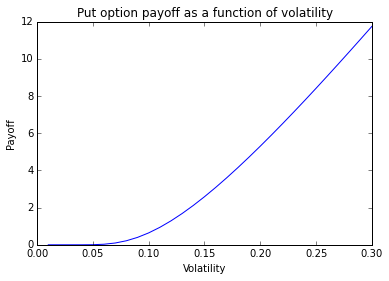

In [9]:
#b)
sigmin = 0.01
sigmax = 0.30
step = 0.01

s = np.arange(sigmin,sigmax+step,step)
d = (mt.log(st/(qt1*k))+tau*s**2/2)/(tau**(1/2)*s)
qtp = qt1*k*norm.cdf(-d+tau**(1/2)*s) - st*norm.cdf(-d)

plt.plot(s,qtp)
plt.title('Put option payoff as a function of volatility')
plt.ylabel('Payoff')
plt.xlabel('Volatility')
plt.show()